In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

# 1 --> UNDERSTANDING DATA

In [2]:
bike_share = pd.read_csv("day.csv")

In [3]:
bike_share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike_share.shape

(730, 16)

# 2 --> PERFORMING CHECKS ON DATA

### A) NULL VALUE CHECK

In [5]:
#Checking the percentage of null value in every column
round(100*(bike_share.isnull().sum()/len(bike_share.index)), 2).sort_values(ascending=False)

cnt           0.0
registered    0.0
casual        0.0
windspeed     0.0
hum           0.0
atemp         0.0
temp          0.0
weathersit    0.0
workingday    0.0
weekday       0.0
holiday       0.0
mnth          0.0
yr            0.0
season        0.0
dteday        0.0
instant       0.0
dtype: float64

OBSERVATION : As we can see there are no null values

In [6]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


OBSERVATION : From above info() we can see that any of the columns does not contain null values as well as data types of all the columns are also appropriate.

### B) UNIQUE VALUE CHECK

In [7]:
#Checking if season,mnth and holiday have unique values only
print("Unique season : ",len(bike_share.season.unique()))
print("Unique mnth : ",len(bike_share.mnth.unique()))
print("Unique holiday : ",len(bike_share.holiday.unique()))


Unique season :  4
Unique mnth :  12
Unique holiday :  2


OBSERVATION : As described in the dictionary provided, season, mnth and holiday has 4,12 and 2 distinct level of data respectively

### C) DUPLICATE VALUE CHECK

In [8]:
# dropping the duplicate rows if any
bike_share.drop_duplicates(inplace=True)

In [9]:
bike_share.shape

(730, 16)

OBSERVATION : As shape of the data frame remains same before and after dropping duplicate rows, we can say that there were no duplicate rows in the data frame

### DROPPING THE REDUNDANT COLUMNS

In [10]:
# Dropping the redundant columns

columns = ['instant','dteday','casual','registered']
bike_share.drop(columns,axis=1,inplace=True)

OBSERVATION : We have dropped these columns as :<br>
instant : is mere serial number thus no use in prediction, analysis<br>
dteday : redundant for analysis<br>
casual,registered : since cnt is the sum of casual & registered, and as per the problem statement cnt is the target variable, casual,registered proves to be redundant

### MAPPING APPROPRIATE VALUES TO THE CATEGORICAL VARIABLES

In [11]:
bike_share.season = bike_share.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike_share.season.head()

0    spring
1    spring
2    spring
3    spring
4    spring
Name: season, dtype: object

In [12]:
bike_share.yr = bike_share.yr.map({0:2018 , 1:2019})
bike_share.yr.head()

0    2018
1    2018
2    2018
3    2018
4    2018
Name: yr, dtype: int64

In [13]:
bike_share.mnth = bike_share.mnth.map({1:'Jan' , 2:'Feb', 3:'Mar', 4:'Apr' , 5:'May', 6:'Jun', 7:'Jul', 8:'Aug',9:'Sep',10:'Oct',11:'Nov', 12:'Dec'})
bike_share.mnth.head()

0    Jan
1    Jan
2    Jan
3    Jan
4    Jan
Name: mnth, dtype: object

In [14]:
bike_share.weekday = bike_share.weekday.map({0:'Sun', 1:'Mon',2:'Tue',3:'Wed',4:'Thurs',5:'Fri',6:'Sat'})
bike_share.weekday.head()

0    Sat
1    Sun
2    Mon
3    Tue
4    Wed
Name: weekday, dtype: object

In [15]:
bike_share.weathersit = bike_share.weathersit.map({1:'Clear' , 2:'Misty', 3:'Light Snow', 4:'Heavy Rain'})
bike_share.weathersit.head()

0    Misty
1    Misty
2    Clear
3    Clear
4    Clear
Name: weathersit, dtype: object

In [16]:
bike_share.holiday = bike_share.holiday.map({1:'Holi_Yes' , 0:'Holi_No'})
bike_share.holiday.head()

0    Holi_No
1    Holi_No
2    Holi_No
3    Holi_No
4    Holi_No
Name: holiday, dtype: object

In [17]:
bike_share.workingday = bike_share.workingday.map({1:'Working_Yes' , 0:'Working_No'})
bike_share.workingday.head()

0     Working_No
1     Working_No
2    Working_Yes
3    Working_Yes
4    Working_Yes
Name: workingday, dtype: object

In [18]:
bike_share.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,Holi_No,Sat,Working_No,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,Holi_No,Sun,Working_No,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,Holi_No,Mon,Working_Yes,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,Holi_No,Tue,Working_Yes,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,Holi_No,Wed,Working_Yes,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [19]:
bike_share.shape

(730, 12)

# 3 --> VISUALIZING THE DATA

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

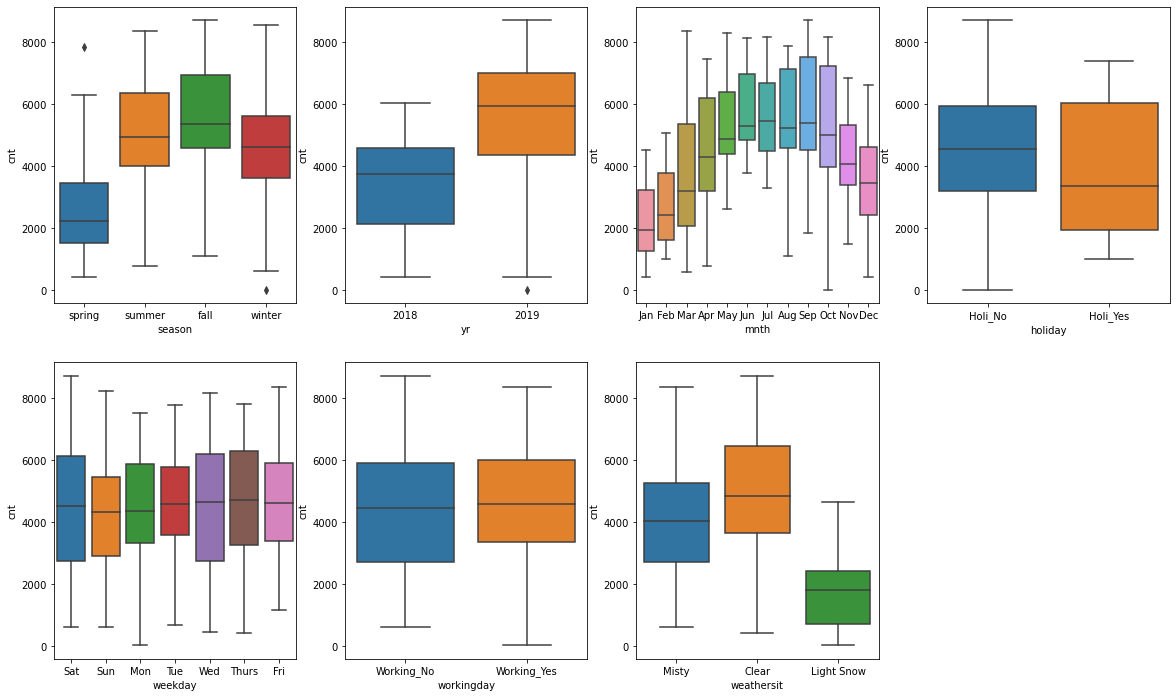

In [20]:
#Visualizing categorical variable
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_share)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_share)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_share)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_share)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_share)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_share)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_share)

OBSERVATION : From above box plots its clear that season, yr, mnth, holiday and weathersit categorical columns do vary vividly in terms of count of bike share users. <BR>
Whereas workingday and weekday shows no such different impact for count.

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

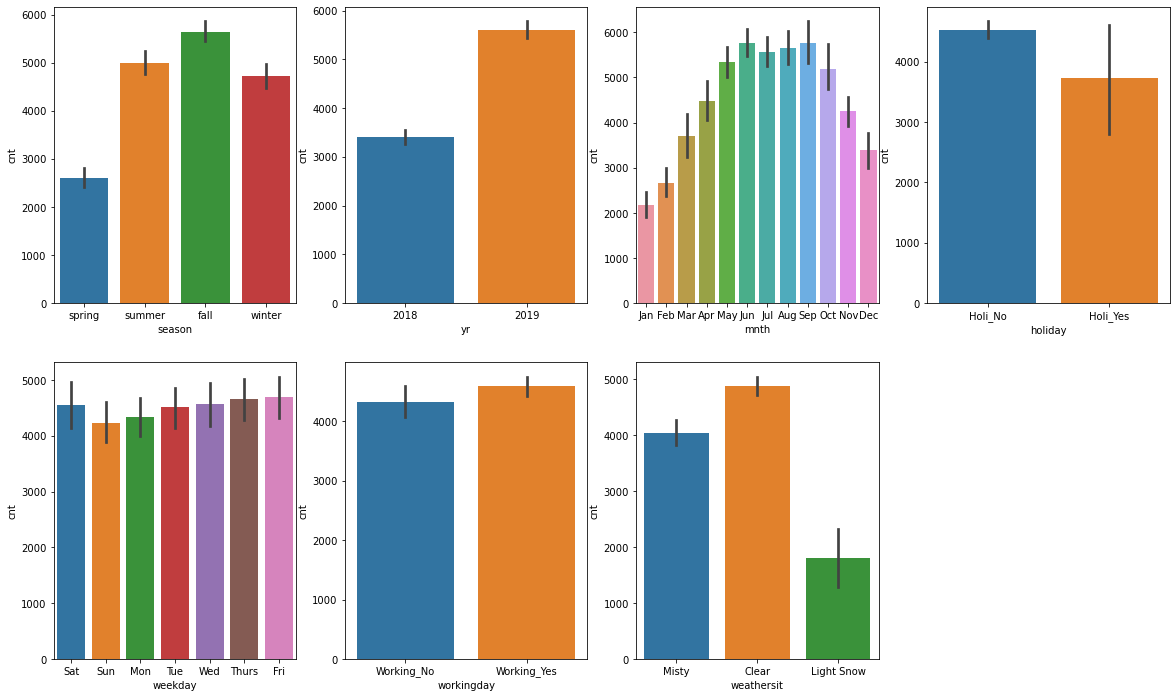

In [21]:
#Visualizing categorical variable
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.barplot(x = 'season', y = 'cnt', data = bike_share)
plt.subplot(2,4,2)
sns.barplot(x = 'yr', y = 'cnt', data = bike_share)
plt.subplot(2,4,3)
sns.barplot(x = 'mnth', y = 'cnt', data = bike_share)
plt.subplot(2,4,4)
sns.barplot(x = 'holiday', y = 'cnt', data = bike_share)
plt.subplot(2,4,5)
sns.barplot(x = 'weekday', y = 'cnt', data = bike_share)
plt.subplot(2,4,6)
sns.barplot(x = 'workingday', y = 'cnt', data = bike_share)
plt.subplot(2,4,7)
sns.barplot(x = 'weathersit', y = 'cnt', data = bike_share)

OBSERVATION : <BR>
From these bar plots we can conclude that,<BR>
1)Most number ok bikes i.e. more than 5,500 are rented in the fall season<BR>
2)Year 2019 saw a steep increase in the number og bike rents from almost 3300 in 2018 to 5700 in 2019.<BR>
3)Most bikes are rented in the month of May to October. May to October month covers most of the summer and fall seasons in USA. Thus this impact can be easily seen in season barplot as well, as there is significant count of bike rentals in summer and fall season as compared to winter and spring.<BR>
4)The bike rental count is mostly equally distributed on all days of the week except for Sunday, which shows significantly low count.<BR>
5)Bikes are mostly not rented on holiday<BR>
6)It can be seen from weathersit barplot that people usually prefer to rent bikes while the weather is clear. Little misty weather makes the preferrances for bike rental a little less, whereas even a light snow discourages people for bile rental.

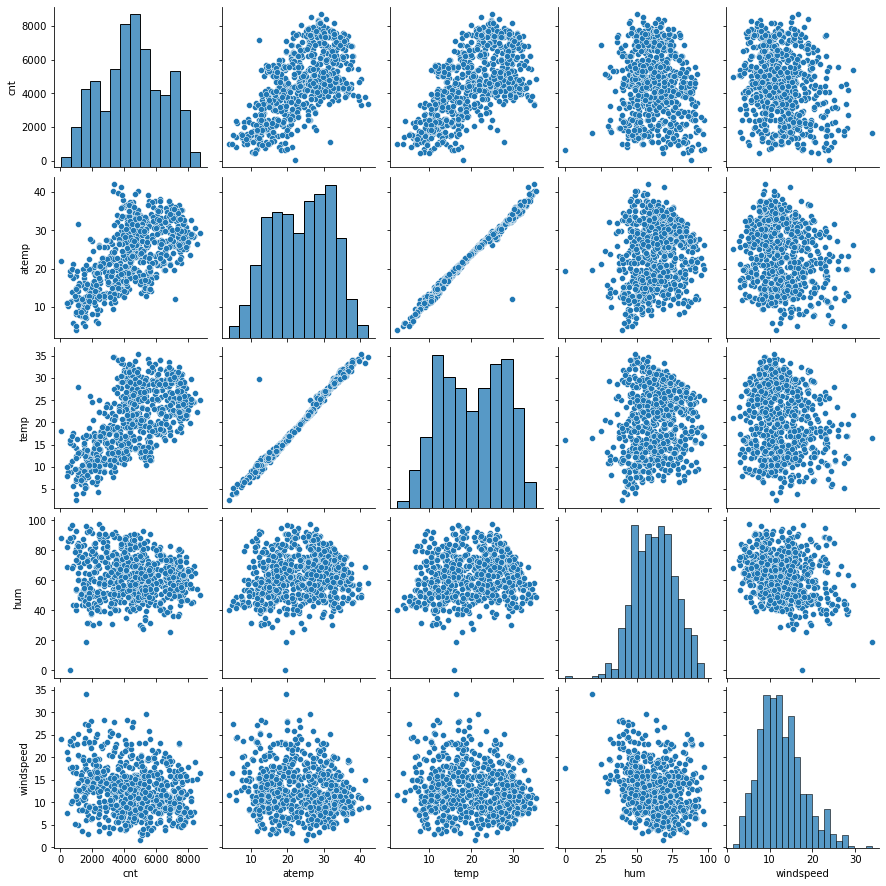

In [22]:
#pairplot for numerical variables
sns.pairplot(bike_share,vars=['cnt','atemp','temp','hum','windspeed'])

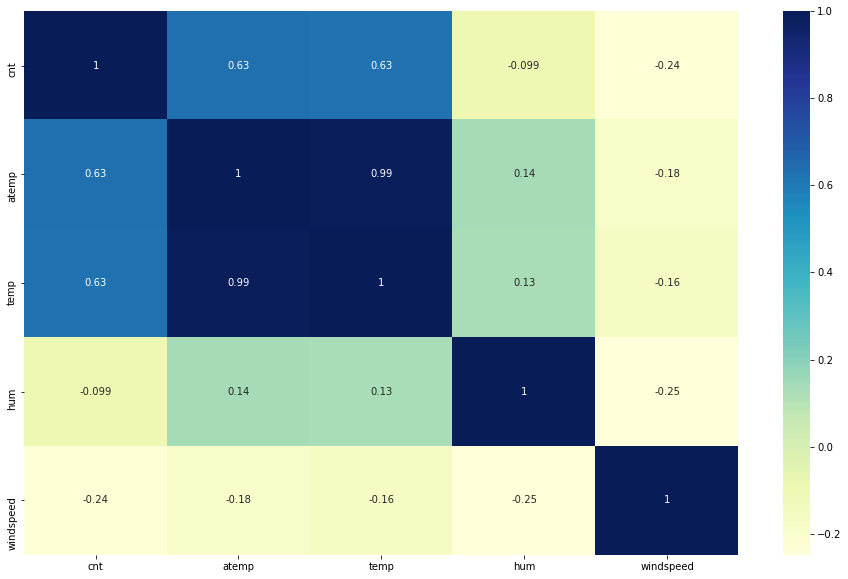

In [23]:
#Looking at correlation between numerical variables
plt.figure(figsize = (16, 10))
sns.heatmap(bike_share[['cnt','atemp','temp','hum','windspeed']].corr(), annot = True, cmap="YlGnBu")
plt.show()

OBSERVATION : From the heatmap it can be seen that atemp and temp columns are highly correlated with correlation facto 0.99. Also correlation factor of atemp and temp with our target variable cnt is same i.e. 0.63. Thus keeping both the columns will not create much difference. Thus we will just assume atemp(as it is the actual felt temperature column) now on.

In [24]:
#dropping temp column
bike_share.drop(['temp'], axis = 1, inplace = True)

In [25]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 88.4+ KB


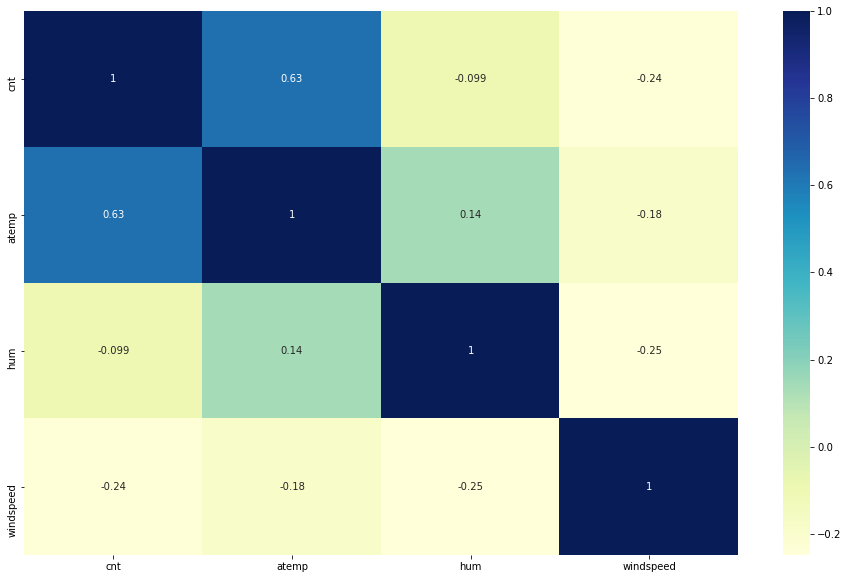

In [26]:
#Looking at correlation between numerical variables
plt.figure(figsize = (16, 10))
sns.heatmap(bike_share[['cnt','atemp','hum','windspeed']].corr(), annot = True, cmap="YlGnBu")
plt.show()

OBSERVATION : Thus now we have a single highly correlated variable i.e. atemp.

# 4 --> DATA PREPARATION

In [27]:
#Create Dummy Variables for season
status = pd.get_dummies(bike_share['season'],drop_first=True)

In [28]:
status.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [29]:
#Add the created dummy variables in the existing data frame
bike_share=pd.concat([bike_share,status] , axis =1)
bike_share.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,winter
0,spring,2018,Jan,Holi_No,Sat,Working_No,Misty,18.18125,80.5833,10.749882,985,1,0,0
1,spring,2018,Jan,Holi_No,Sun,Working_No,Misty,17.68695,69.6087,16.652113,801,1,0,0
2,spring,2018,Jan,Holi_No,Mon,Working_Yes,Clear,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,2018,Jan,Holi_No,Tue,Working_Yes,Clear,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,2018,Jan,Holi_No,Wed,Working_Yes,Clear,11.46350,43.6957,12.522300,1600,1,0,0


In [30]:
#Drop the column season as it is redundant after the creation of dummy variables
bike_share.drop(['season'], axis = 1, inplace = True)

OBSERVATION : Here we have created dummy variables for season column and splitted a single column into 3 different columns spring, summer winter. We have also dropped the fall sesaon pertaining to the rule that n levels will create n-1 dummy variables

In [31]:
bike_share.head()

,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,winter
0,2018,Jan,Holi_No,Sat,Working_No,Misty,18.18125,80.5833,10.749882,985,1,0,0
1,2018,Jan,Holi_No,Sun,Working_No,Misty,17.68695,69.6087,16.652113,801,1,0,0
2,2018,Jan,Holi_No,Mon,Working_Yes,Clear,9.47025,43.7273,16.636703,1349,1,0,0
3,2018,Jan,Holi_No,Tue,Working_Yes,Clear,10.60610,59.0435,10.739832,1562,1,0,0
4,2018,Jan,Holi_No,Wed,Working_Yes,Clear,11.46350,43.6957,12.522300,1600,1,0,0


In [32]:
#Create Dummy Variables for weathersit
status1 = pd.get_dummies(bike_share['weathersit'],drop_first=True)
status1.head()

,Light Snow,Misty
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [33]:
#Add the created dummy variables in the existing data frame
bike_share=pd.concat([bike_share,status1] , axis =1)
#Drop the column weathersit as it is redundant after the creation of dummy variables
bike_share.drop(['weathersit'], axis = 1, inplace = True)
bike_share.head()

,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Light Snow,Misty
0,2018,Jan,Holi_No,Sat,Working_No,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,2018,Jan,Holi_No,Sun,Working_No,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,2018,Jan,Holi_No,Mon,Working_Yes,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,2018,Jan,Holi_No,Tue,Working_Yes,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,2018,Jan,Holi_No,Wed,Working_Yes,11.46350,43.6957,12.522300,1600,1,0,0,0,0


OBSERVATION : Here we have created dummy variables for weathersit column and splitted a single column into 2 different columns Light Snow and Misty. We have also dropped the Clear sesaon pertaining to the rule that n levels will create n-1 dummy variables

In [34]:
#Create Dummy Variables for mnth
status2 = pd.get_dummies(bike_share['mnth'],drop_first=True)
status2.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [35]:
#Add the created dummy variables in the existing data frame
bike_share=pd.concat([bike_share,status2] , axis =1)
#Drop the column mnth as it is redundant after the creation of dummy variables
bike_share.drop(['mnth'], axis = 1, inplace = True)
bike_share.head()

,yr,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,2018,Holi_No,Sat,Working_No,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,2018,Holi_No,Sun,Working_No,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,2018,Holi_No,Mon,Working_Yes,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,2018,Holi_No,Tue,Working_Yes,10.60610,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,0,0,0
4,2018,Holi_No,Wed,Working_Yes,11.46350,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,0,0,0,0


OBSERVATION : Here we have created dummy variables for mnth column and splitted a single column into 11 different columns .

In [36]:
#Create Dummy Variables for weekday
status3 = pd.get_dummies(bike_share['weekday'],drop_first=True)
status3.head()

,Mon,Sat,Sun,Thurs,Tue,Wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [37]:
#Add the created dummy variables in the existing data frame
bike_share=pd.concat([bike_share,status3] , axis =1)
#Drop the column weekday as it is redundant after the creation of dummy variables
bike_share.drop(['weekday'], axis = 1, inplace = True)
bike_share.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thurs,Tue,Wed
0,2018,Holi_No,Working_No,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2018,Holi_No,Working_No,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2018,Holi_No,Working_Yes,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2018,Holi_No,Working_Yes,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2018,Holi_No,Working_Yes,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,1


OBSERVATION : Here we have created dummy variables for weekday column and splitted a single column into 6 different columns. We have also dropped the first column pertaining to the rule that n levels will create n-1 dummy variables

In [38]:
#Create Dummy Variables for yr
status4 = pd.get_dummies(bike_share['yr'],drop_first=True)
#Add the created dummy variables in the existing data frame
bike_share=pd.concat([bike_share,status4] , axis =1)
#Drop the column yr as it is redundant after the creation of dummy variables
bike_share.drop(['yr'], axis = 1, inplace = True)
bike_share.head()

,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Light Snow,...,Nov,Oct,Sep,Mon,Sat,Sun,Thurs,Tue,Wed,2019
0,Holi_No,Working_No,18.18125,80.5833,10.749882,985,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,Holi_No,Working_No,17.68695,69.6087,16.652113,801,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Holi_No,Working_Yes,9.47025,43.7273,16.636703,1349,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,Holi_No,Working_Yes,10.60610,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Holi_No,Working_Yes,11.46350,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


OBSERVATION : Here we have created dummy variables for yr column and splitted a single column into 1 different columns . We have also dropped the first column pertaining to the rule that n levels will create n-1 dummy variables

In [39]:
#Create Dummy Variables for holiday
status5 = pd.get_dummies(bike_share['holiday'],drop_first=True)
#Add the created dummy variables in the existing data frame
bike_share=pd.concat([bike_share,status5] , axis =1)
#Drop the column holiday as it is redundant after the creation of dummy variables
bike_share.drop(['holiday'], axis = 1, inplace = True)
bike_share.head()

,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Light Snow,Misty,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tue,Wed,2019,Holi_Yes
0,Working_No,18.18125,80.5833,10.749882,985,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,Working_No,17.68695,69.6087,16.652113,801,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,Working_Yes,9.47025,43.7273,16.636703,1349,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,Working_Yes,10.60610,59.0435,10.739832,1562,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,Working_Yes,11.46350,43.6957,12.522300,1600,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


OBSERVATION : Here we have created dummy variables for holiday column and splitted a single column into 1 different columns . We have also dropped the first column pertaining to the rule that n levels will create n-1 dummy variables

In [40]:
#Create Dummy Variables for workingday
status6 = pd.get_dummies(bike_share['workingday'],drop_first=True)
#Add the created dummy variables in the existing data frame
bike_share=pd.concat([bike_share,status6] , axis =1)
#Drop the column workingday as it is redundant after the creation of dummy variables
bike_share.drop(['workingday'], axis = 1, inplace = True)
bike_share.head()

,atemp,hum,windspeed,cnt,spring,summer,winter,Light Snow,Misty,Aug,...,Sep,Mon,Sat,Sun,Thurs,Tue,Wed,2019,Holi_Yes,Working_Yes
0,18.18125,80.5833,10.749882,985,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,17.68695,69.6087,16.652113,801,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


OBSERVATION : Here we have created dummy variables for workingday column and splitted a single column into 1 different columns . We have also dropped the first column pertaining to the rule that n levels will create n-1 dummy variables

In [41]:
bike_share.Holi_Yes.unique()

array([0, 1], dtype=uint8)

In [42]:
bike_share.Working_Yes.unique()

array([0, 1], dtype=uint8)

In [43]:
bike_share.info

<bound method DataFrame.info of         atemp      hum  windspeed   cnt  spring  summer  winter  Light Snow  \
0    18.18125  80.5833  10.749882   985       1       0       0           0   
1    17.68695  69.6087  16.652113   801       1       0       0           0   
2     9.47025  43.7273  16.636703  1349       1       0       0           0   
3    10.60610  59.0435  10.739832  1562       1       0       0           0   
4    11.46350  43.6957  12.522300  1600       1       0       0           0   
..        ...      ...        ...   ...     ...     ...     ...         ...   
725  11.33210  65.2917  23.458911  2114       1       0       0           0   
726  12.75230  59.0000  10.416557  3095       1       0       0           0   
727  12.12000  75.2917   8.333661  1341       1       0       0           0   
728  11.58500  48.3333  23.500518  1796       1       0       0           0   
729  11.17435  57.7500  10.374682  2729       1       0       0           0   

     Misty  Aug  ..

In [44]:
bike_share.head()

,atemp,hum,windspeed,cnt,spring,summer,winter,Light Snow,Misty,Aug,...,Sep,Mon,Sat,Sun,Thurs,Tue,Wed,2019,Holi_Yes,Working_Yes
0,18.18125,80.5833,10.749882,985,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,17.68695,69.6087,16.652113,801,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


# 5 --> SPLIT INTO TRAIN TEST DATA

In [45]:
#Train Test Split
from sklearn.model_selection import train_test_split
np.random.seed(0)
bike_share_Train, bike_share_Test = train_test_split(bike_share, train_size = 0.7, test_size = 0.3, random_state = 100)

In [46]:
bike_share_Train.shape

(510, 29)

In [47]:
bike_share_Test.shape

(219, 29)

In [48]:
bike_share.shape

(730, 29)

In [49]:
bike_share_Train.head()

,atemp,hum,windspeed,cnt,spring,summer,winter,Light Snow,Misty,Aug,...,Sep,Mon,Sat,Sun,Thurs,Tue,Wed,2019,Holi_Yes,Working_Yes
653,23.0423,55.8333,12.208807,7534,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
576,33.1448,70.4167,11.083475,7216,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
426,20.6746,62.1250,10.792293,4066,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
728,11.5850,48.3333,23.500518,1796,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
482,18.8752,48.9583,8.708325,4220,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [50]:
bike_share_Test.head()

,atemp,hum,windspeed,cnt,spring,summer,winter,Light Snow,Misty,Aug,...,Sep,Mon,Sat,Sun,Thurs,Tue,Wed,2019,Holi_Yes,Working_Yes
184,33.27085,63.7917,5.459106,6043,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
535,36.04875,59.2083,7.625404,6211,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
299,22.85230,81.2917,13.250121,2659,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
221,34.24915,42.4167,13.417286,4780,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
152,32.19710,30.5000,19.583229,4968,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


# 6 --> SCALING THE TRAIN DATA

In [51]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Apply scaler() to all the numerical columns except the 'dummy' variables
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']

bike_share_Train[num_vars] = scaler.fit_transform(bike_share_Train[num_vars])

<ipython-input-51-96484a45381d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_share_Train[num_vars] = scaler.fit_transform(bike_share_Train[num_vars])
C:\Users\sunil\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


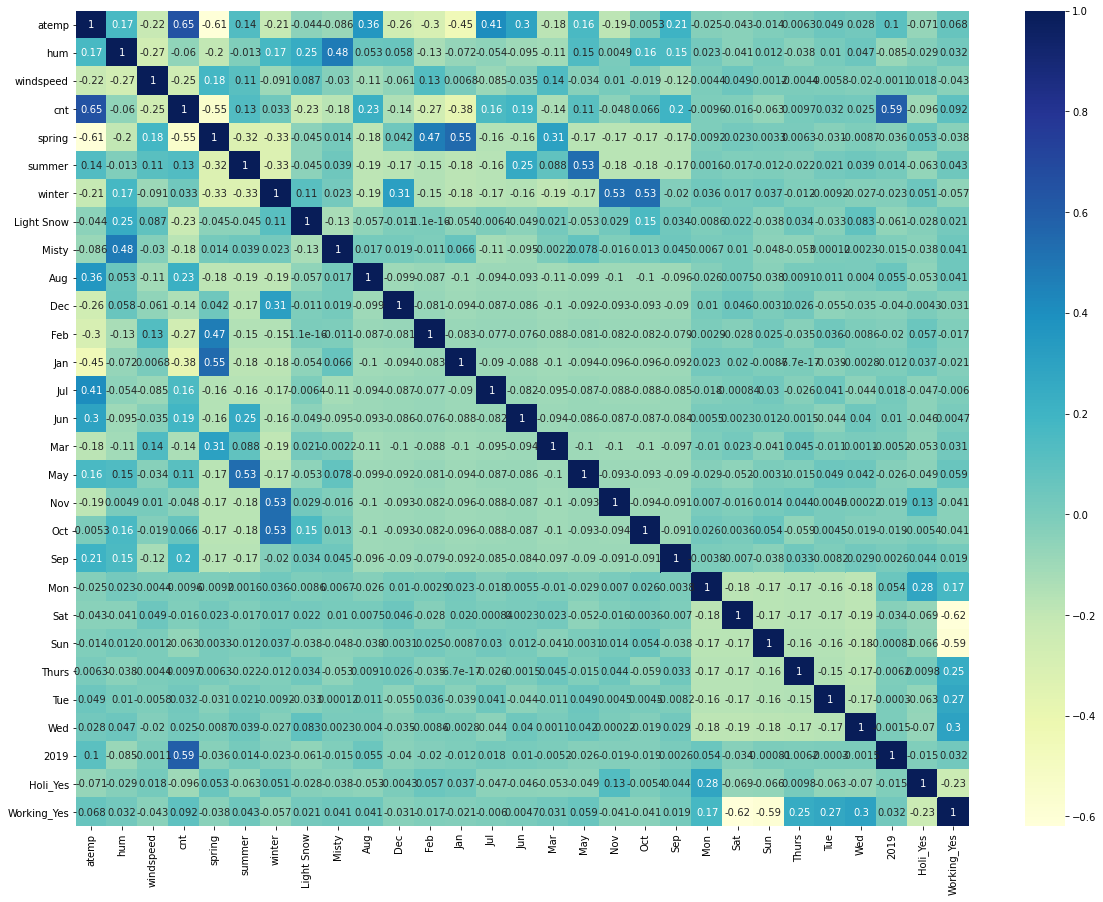

In [52]:
plt.figure(figsize = (20, 15))
sns.heatmap(bike_share_Train.corr(), annot = True, cmap="YlGnBu")
plt.show()

OBSERVATIOn : atemp seems to be strongly correlated to cnt. Thus let us see a plot for the same

# 7 --> DEFINING X and y OF THE TRAIN DATA 

In [53]:
X_Train = bike_share_Train
y_Train = bike_share_Train.pop('cnt')

In [54]:
X_Train.head()

,atemp,hum,windspeed,spring,summer,winter,Light Snow,Misty,Aug,Dec,...,Sep,Mon,Sat,Sun,Thurs,Tue,Wed,2019,Holi_Yes,Working_Yes
653,0.501133,0.575354,0.300794,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
576,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
426,0.438975,0.640189,0.255342,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
728,0.200348,0.498067,0.663106,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
482,0.391735,0.504508,0.188475,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [55]:
y_Train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

# 8 --> performing RFE - Recursive Feature Elimination

In [56]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


lm = LinearRegression()
lm.fit(X_Train, y_Train)

# Performing RFE on our bike_share_Train dataset in order to eleminate the columns 
rfe = RFE(lm, 15)             
rfe = rfe.fit(X_Train, y_Train)

C:\Users\sunil\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [57]:
#Listing the RFE ranks of columns
list(zip(X_Train.columns,rfe.support_,rfe.ranking_))

[('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 5),
 ('winter', True, 1),
 ('Light Snow', True, 1),
 ('Misty', True, 1),
 ('Aug', False, 6),
 ('Dec', True, 1),
 ('Feb', False, 3),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 8),
 ('Mar', False, 11),
 ('May', False, 4),
 ('Nov', True, 1),
 ('Oct', False, 10),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', False, 7),
 ('Thurs', False, 14),
 ('Tue', False, 12),
 ('Wed', False, 13),
 (2019, True, 1),
 ('Holi_Yes', True, 1),
 ('Working_Yes', False, 2)]

In [58]:
#Viewing the columns that are significant according to RFE
col = X_Train.columns[rfe.support_]
col

Index([     'atemp',        'hum',  'windspeed',     'spring',     'winter',
       'Light Snow',      'Misty',        'Dec',        'Jan',        'Jul',
              'Nov',        'Sep',        'Sat',         2019,   'Holi_Yes'],
      dtype='object')

In [59]:
#Viewing the columns that are not significant according to RFE
X_Train.columns[~rfe.support_]

Index(['summer', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct', 'Mon', 'Sun',
       'Thurs', 'Tue', 'Wed', 'Working_Yes'],
      dtype='object')

In [60]:
# Generic function to calculate VIF of variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [61]:
X_Train_RFE = X_Train[col]

In [62]:
# calculate VIF

calculateVIF(X_Train_RFE)

,Features,VIF
1,hum,25.08
0,atemp,16.88
2,windspeed,4.03
4,winter,2.93
3,spring,2.89
6,Misty,2.26
13,2019,2.06
10,Nov,1.82
8,Jan,1.75
7,Dec,1.54


OBSERVATIOn : hum column has the highest VIF

# 9 --> BUILDING A MODEL ON TRAIN DATASET

## MODEL 1

In [63]:
# Adding a constant variable 

import statsmodels.api as sm 

X_Train_lm = sm.add_constant(X_Train_RFE)

# Running the linear model 1

lm = sm.OLS(y_Train,X_Train_lm).fit() 

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.4
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          9.67e-187
Time:                        19:34:42   Log-Likelihood:                 508.84
No. Observations:                 510   AIC:                            -985.7
Df Residuals:                     494   BIC:                            -917.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3662      0.032     11.425      0.0

OBSERVATIOn : <BR>
1->R squared value is 0.842. This means that the 84.2% variance in cnt column is described by the independant variables obtained from RFE<BR>
2->We  have obtained -ve coeff for some variables<BR>
3->Highest p-Value is shown by Sat variable

## MODEL 2:

OBSERVATIOn : As previously we found high VIF for hum column, we will drop it.

In [64]:
#Drop hum
X_Train_2 = X_Train_RFE.drop(['hum'], axis = 1)

In [65]:
#Calculate vIF again
calculateVIF(X_Train_2)

,Features,VIF
0,atemp,4.61
1,windspeed,3.98
3,winter,2.55
2,spring,2.36
12,2019,2.06
9,Nov,1.80
7,Jan,1.65
5,Misty,1.53
6,Dec,1.46
8,Jul,1.35


OBSERVATIOn : All the VIF values seems to be proper

In [66]:
#Build model 2
X_Train_lm_2 = sm.add_constant(X_Train_2)

# Running the linear model 2

lm_2 = sm.OLS(y_Train,X_Train_lm_2).fit() 

print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     181.7
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.10e-184
Time:                        19:34:42   Log-Likelihood:                 501.21
No. Observations:                 510   AIC:                            -972.4
Df Residuals:                     495   BIC:                            -908.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2902      0.026     11.288      0.0

OBSERVATIOn : <BR>
1->There is a slight change in R squared value<BR>
2->Sat column remains to give the highest p value

OBSERVATION : Let us Drop Sat column having high p value

In [67]:
#Drop Sat
X_Train_3 = X_Train_2.drop(['Sat'], axis = 1)

In [68]:
#Calculate vIF again
calculateVIF(X_Train_3)

,Features,VIF
0,atemp,4.57
1,windspeed,3.95
3,winter,2.55
2,spring,2.35
11,2019,2.06
9,Nov,1.80
7,Jan,1.65
5,Misty,1.53
6,Dec,1.46
8,Jul,1.35


OBSERVATION : Since VIF has not shown major deflection, we will try to build a better model

## MODEL 3

In [69]:
#Build model 3
X_Train_lm_3 = sm.add_constant(X_Train_3)

# Running the linear model 3

lm_3 = sm.OLS(y_Train,X_Train_lm_3).fit() 

print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.5
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          3.95e-185
Time:                        19:34:42   Log-Likelihood:                 499.52
No. Observations:                 510   AIC:                            -971.0
Df Residuals:                     496   BIC:                            -911.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2931      0.026     11.396      0.0

OBSERVATION :<BR>
1->There is a slight change in R squared value<BR>
2->Nov column has the highest p value

OBSERVATION : Let us Drop Sat column having high p value

In [70]:
#Drop Nov
X_Train_4 = X_Train_3.drop(['Nov'], axis = 1)

In [71]:
#Calculate vIF again
calculateVIF(X_Train_4)

,Features,VIF
0,atemp,4.54
1,windspeed,3.91
2,spring,2.35
10,2019,2.06
3,winter,1.64
7,Jan,1.64
5,Misty,1.53
8,Jul,1.35
6,Dec,1.29
9,Sep,1.20


OBSERVATION : Since VIF has not shown major deflection, we will try to build a better model

## MODEL 4

In [72]:
#Build model 4
X_Train_lm_4 = sm.add_constant(X_Train_4)

# Running the linear model 4

lm_4 = sm.OLS(y_Train,X_Train_lm_4).fit() 

print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     207.6
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          8.41e-185
Time:                        19:34:42   Log-Likelihood:                 495.96
No. Observations:                 510   AIC:                            -965.9
Df Residuals:                     497   BIC:                            -910.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2803      0.025     11.031      0.0

OBSERVATION :<BR>
1->There is a slight change in R squared value<BR>
2->Jan column has the highest p value

OBSERVATION : Let us Drop Jan column having high p value

In [73]:
#Drop Jan
X_Train_5 = X_Train_4.drop(['Jan'], axis = 1)

In [74]:
#Calculate vIF again
calculateVIF(X_Train_4)

,Features,VIF
0,atemp,4.54
1,windspeed,3.91
2,spring,2.35
10,2019,2.06
3,winter,1.64
7,Jan,1.64
5,Misty,1.53
8,Jul,1.35
6,Dec,1.29
9,Sep,1.20


## MODEL 5

In [75]:
#Build model 5
X_Train_lm_5 = sm.add_constant(X_Train_5)

# Running the linear model 5

lm_5 = sm.OLS(y_Train,X_Train_lm_5).fit() 

print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     222.8
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          2.43e-184
Time:                        19:34:42   Log-Likelihood:                 492.06
No. Observations:                 510   AIC:                            -960.1
Df Residuals:                     498   BIC:                            -909.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2610      0.025     10.610      0.0

OBSERVATION :<BR>
1->There is a slight change in R squared value<BR>
2->Dec column has the highest p value

OBSERVATION : Let us Drop Dec column having high p value

In [76]:
#Drop Jan
X_Train_6 = X_Train_5.drop(['Dec'], axis = 1)

In [77]:
#Calculate vIF again
calculateVIF(X_Train_6)

,Features,VIF
0,atemp,4.51
1,windspeed,3.90
8,2019,2.05
2,spring,1.63
5,Misty,1.52
3,winter,1.40
6,Jul,1.35
7,Sep,1.20
4,Light Snow,1.08
9,Holi_Yes,1.04


## MODEL 6

In [78]:
#Build model 6
X_Train_lm_6 = sm.add_constant(X_Train_6)

# Running the linear model 6

lm_6 = sm.OLS(y_Train,X_Train_lm_6).fit() 

print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.0
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          5.68e-185
Time:                        19:34:42   Log-Likelihood:                 490.70
No. Observations:                 510   AIC:                            -959.4
Df Residuals:                     499   BIC:                            -912.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2544      0.024     10.468      0.0

OBSERVATION :<BR>
1->There is a slight change in R squared value<br>
2->winter column has the highest p value

OBSERVATION : Let us Drop winter column having high p value

In [79]:
#Drop Jan
X_Train_7 = X_Train_6.drop(['winter'], axis = 1)

In [80]:
#Calculate vIF again
calculateVIF(X_Train_7)

,Features,VIF
0,atemp,4.50
1,windspeed,3.75
7,2019,2.03
2,spring,1.51
4,Misty,1.49
5,Jul,1.32
6,Sep,1.20
3,Light Snow,1.06
8,Holi_Yes,1.03


## MODEL 7

In [81]:
#Build model 7
X_Train_lm_7 = sm.add_constant(X_Train_7)

# Running the linear model 7

lm_7 = sm.OLS(y_Train,X_Train_lm_7).fit() 

print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     265.2
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          4.83e-184
Time:                        19:34:42   Log-Likelihood:                 485.62
No. Observations:                 510   AIC:                            -951.2
Df Residuals:                     500   BIC:                            -908.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3008      0.020     15.373      0.0

OBSERVATION :<BR>
1->There is a slight change in R squared value<BR>
2->Holi_Yes is the only column has with >0 p value

OBSERVATION : Let us Drop Holi_Yes column having high p value

In [82]:
#Drop Holi_Yes
X_Train_8 = X_Train_7.drop(['Holi_Yes'], axis = 1)

In [83]:
#Calculate vIF again
calculateVIF(X_Train_8)

,Features,VIF
0,atemp,4.50
1,windspeed,3.74
7,2019,2.03
2,spring,1.51
4,Misty,1.49
5,Jul,1.31
6,Sep,1.19
3,Light Snow,1.06


## MODEL 8

In [84]:
#Build model 8
X_Train_lm_8 = sm.add_constant(X_Train_8)

# Running the linear model 8

lm_8 = sm.OLS(y_Train,X_Train_lm_8).fit() 

print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     290.9
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          7.68e-183
Time:                        19:34:43   Log-Likelihood:                 479.85
No. Observations:                 510   AIC:                            -941.7
Df Residuals:                     501   BIC:                            -903.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2957      0.020     15.002      0.0

OBSERVATION :<BR>
This model can be consisdered for evaluation as:<BR>
1-> It has low multicolinearity between the predictor variables<BR>
2-> p-value for most of its variable is 0<BR>
3-> Since p-value is 0, all the predictors seems to be significant<BR>
4->F-statistics value = 290.9 , its greater than 1.

# 10 -> MODEL EVALUATION

In [85]:
X_Train_lm_8.head()

,const,atemp,windspeed,spring,Light Snow,Misty,Jul,Sep,2019
653,1.0,0.501133,0.300794,0,0,0,0,0,1
576,1.0,0.766351,0.264686,0,0,0,1,0,1
426,1.0,0.438975,0.255342,1,0,1,0,0,1
728,1.0,0.200348,0.663106,1,0,0,0,0,1
482,1.0,0.391735,0.188475,0,0,1,0,0,1


In [86]:
#Finding the predicted value for Y based on our final model
y_Train_Pred = lm_8.predict(X_Train_lm_8)

## A) Evaluating Error Terms

C:\Users\sunil\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

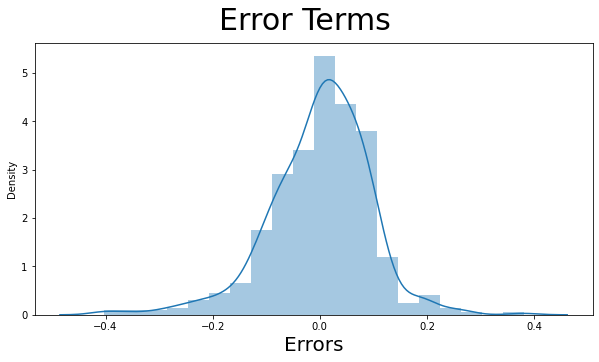

In [87]:
# Plotting histogram for error terms

fig = plt.figure(figsize=(10, 5))
sns.distplot((y_Train - y_Train_Pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 30) 
plt.xlabel('Errors', fontsize = 20)

OBSERVATION : Thus we can see that the error terms are normally distributed

## B) Evaluating VIF

In [88]:
calculateVIF(X_Train_8)

,Features,VIF
0,atemp,4.50
1,windspeed,3.74
7,2019,2.03
2,spring,1.51
4,Misty,1.49
5,Jul,1.31
6,Sep,1.19
3,Light Snow,1.06


OBSERVATION : We can see that the VIF is <5 for all the independant variables which is good case.

## c) Evaluation From Heat Map

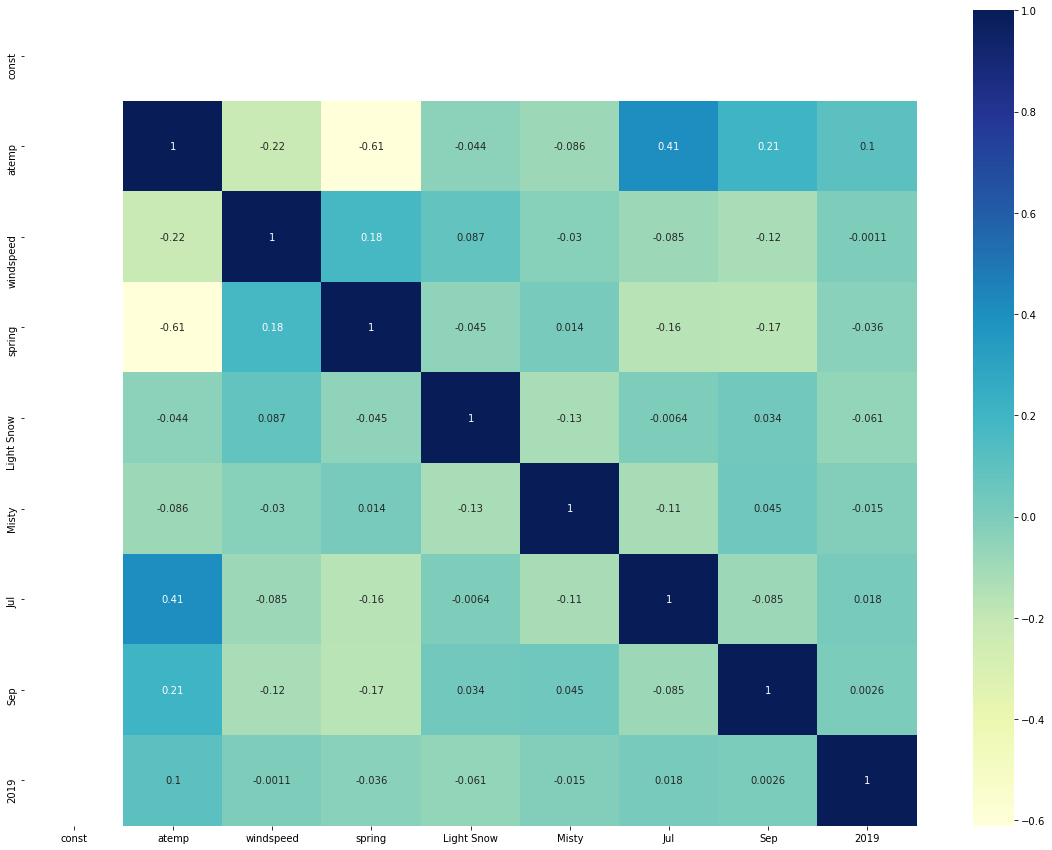

In [89]:
plt.figure(figsize=(20,15))
sns.heatmap(X_Train_lm_8.corr(),annot = True, cmap="YlGnBu")
plt.show()

Thus from Heatmap it can be deduced that there is no multicollinearity

## D) Evaluation for Linearity

### a) atemp vs cnt

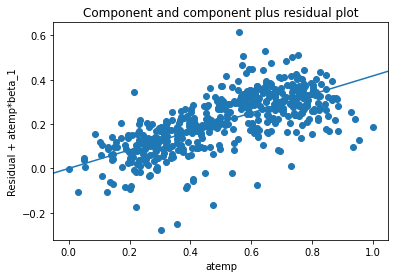

In [90]:
#Linearity between atemp and cnt
sm.graphics.plot_ccpr(lm_8, 'atemp')
plt.show()

OBSERVATION : Thus there is a linear relationship between dependant variable cnt and independant variable atemp

### b) windspeed vs cnt

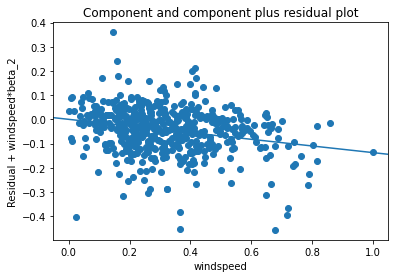

In [91]:
#Linearity between atemp and cnt
sm.graphics.plot_ccpr(lm_8, 'windspeed')
plt.show()

OBSERVATION : Thus there is a linear relationship between dependant variable cnt and independant variable windspeed

# 11 ->HOMOSCEDASTICITY

C:\Users\sunil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


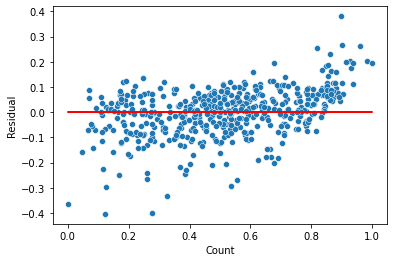

In [92]:

sns.scatterplot(y_Train,(y_Train - y_Train_Pred))
plt.plot(y_Train,(y_Train - y_Train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

OBSERVATION : Thus we can see that residuals have constant variance w.r.t. the target variable 'cnt'

# 12 --> Predictions Using the Final Model

### SCALING TEST DATA

In [93]:
#Scaling on the test dataset
scaler = MinMaxScaler()
# Apply scaler() to all the numerical columns except the 'dummy' variables
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']

bike_share_Test[num_vars] = scaler.fit_transform(bike_share_Test[num_vars])

<ipython-input-93-7e8ad4ce3a89>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_share_Test[num_vars] = scaler.fit_transform(bike_share_Test[num_vars])
C:\Users\sunil\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [94]:
bike_share_Test.head()

,atemp,hum,windspeed,cnt,spring,summer,winter,Light Snow,Misty,Aug,...,Sep,Mon,Sat,Sun,Thurs,Tue,Wed,2019,Holi_Yes,Working_Yes
184,0.778767,0.534223,0.149393,0.704300,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
535,0.855132,0.470417,0.231142,0.725421,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
299,0.492359,0.777843,0.443398,0.278853,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
221,0.805661,0.236659,0.449707,0.545512,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
152,0.749249,0.070765,0.682387,0.569148,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


### DEFINING X and y of TEST DATA

In [95]:
X_Test = bike_share_Test
y_Test = bike_share_Test.pop('cnt')

In [96]:
# Creating the X variables for Test

cols = X_Train_8.columns
cols

Index(['atemp', 'windspeed', 'spring', 'Light Snow', 'Misty', 'Jul', 'Sep',
       2019],
      dtype='object')

In [97]:
X_Test = X_Test[cols]
X_Test.head()


,atemp,windspeed,spring,Light Snow,Misty,Jul,Sep,2019
184,0.778767,0.149393,0,0,1,1,0,0
535,0.855132,0.231142,0,0,0,0,0,1
299,0.492359,0.443398,0,0,1,0,0,0
221,0.805661,0.449707,0,0,0,0,0,0
152,0.749249,0.682387,0,0,0,0,0,0


In [98]:
# Adding constant
X_Test_lm_8 = sm.add_constant(X_Test)

# Making predictions using the 8th model
y_Pred = lm_8.predict(X_Test_lm_8)

# 13 --> MODEL EVALUATION ON TEST DATA

Text(0, 0.5, 'PREDICTED BIKE RENTAL COUNT\n')

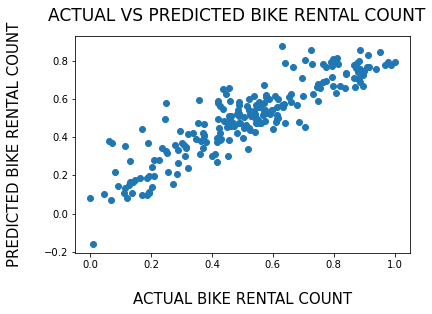

In [99]:
# Plotting y_test vs  y_pred

fig = plt.figure()
plt.scatter(y_Test, y_Pred)
fig.suptitle('ACTUAL VS PREDICTED BIKE RENTAL COUNT\n', fontsize = 17)               
plt.xlabel('\nACTUAL BIKE RENTAL COUNT', fontsize = 15)                          
plt.ylabel('PREDICTED BIKE RENTAL COUNT\n', fontsize = 15)   

In [100]:
round(lm_8.params,4)

const         0.2957
atemp         0.4174
windspeed    -0.1377
spring       -0.1458
Light Snow   -0.2720
Misty        -0.0807
Jul          -0.0690
Sep           0.0551
2019          0.2362
dtype: float64

OBSERVATION :<BR>
Thus the equation for best fitted line is:<BR>
y = 0.2957 + 0.4174*atemp - 0.1377*windspeed - 0.1458*spring - 0.2720*(Light Snow) -0.0807*Misty - 0.0690*(Jul) +0.0551*(Sep) + 0.2362*(2019)

## R^2 value

In [101]:
from sklearn.metrics import r2_score
r2 = r2_score(y_Test, y_Pred)
r2

0.7937926374766797

## ADJUSTED R^2 value

In [102]:
# Calculating Adjusted-R^2 value for the test dataset
adjtd_r = round(1-(1-r2)*(X_Test.shape[0]-1)/(X_Test.shape[0]-X_Test.shape[1]-1),4)
print(adjtd_r)

0.7859


## VISUALIZING THE FIT

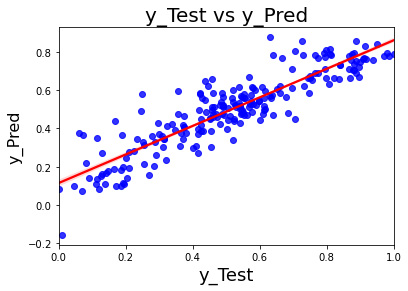

In [103]:
plt.figure()
sns.regplot(x=y_Test, y=y_Pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_Test vs y_Pred', fontsize=20)
plt.xlabel('y_Test', fontsize=18)
plt.ylabel('y_Pred', fontsize=16)
plt.show()

# 14 --> CONCLUSION

Conclusion :<BR>
1)Year 2019 saw a steep increase in the number og bike rents from almost 3300 in 2018 to 5700 in 2019.<BR>
2)Most bikes are rented in the month of May to October. May to October month covers most of the summer and fall seasons in USA. Thus this impact can be easily seen in season barplot as well, as there is significant count of bike rentals in summer and fall season as compared to winter and spring.<BR>
3)It can be seen that people usually prefer to rent bikes while the weather is clear. Little misty weather makes the preferrances for bike rental a little less, whereas even a light snow discourages people for bile rental.<BR>

Thus the sales of BoomBikes on clear days, thus BoomBikes should have a close check on wether forecast and thus keep the availability of bikes for such days so that customers won't face any issues. Also it is seen that count of BoomBikes has seen increase in fall season. Thus BoomBikes can surely plan for more and more advertisements from summer season itself such that by fall season BoomBikes can reach maximum target audience and increase the chances on improving the business.